In [3]:
import numpy as np
import pandas as pd

In [4]:
mass_shooting = pd.read_csv('History_of_Mass_Shootings_in_the_USA.csv')

In [5]:
mass_shooting.head()

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-23,Renton,Washington,1,6,7,"Seven people were shot, one fatally, shortly a..."
1,2022-07-23,Chicago,Illinois,0,4,4,A man got out of a black truck and opened fire...
2,2022-07-22,Maquoketa,Iowa,4,0,4,Iowa State Park shooting: A man shot and kille...
3,2022-07-21,Los Angeles,California,0,4,4,Two men shot four people standing outside a CV...
4,2022-07-19,Lincoln,Nebraska,0,4,4,"Four people, including a teenager, were shot i..."


In [6]:
mass_shooting.shape

(2488, 7)

In [7]:
mass_shooting.describe()

,Dead,Injured,Total
count,2488.000000,2488.000000,2488.000000
mean,1.036977,4.077572,5.113344
std,1.562863,2.314447,2.578563
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,5.000000,5.000000
max,23.000000,27.000000,46.000000


In [8]:
mass_shooting.dtypes

Date           object
City           object
State          object
Dead            int64
Injured         int64
Total           int64
Description    object
dtype: object

In [9]:
mass_shooting['Date'] = pd.to_datetime(mass_shooting['Date'], format='%Y-%m-%d')

In [10]:
mass_shooting.dtypes

Date           datetime64[ns]
City                   object
State                  object
Dead                    int64
Injured                 int64
Total                   int64
Description            object
dtype: object

In [11]:
mass_shooting.isnull().sum()

Date           0
City           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [12]:
mass_shooting['Date'].agg({'min', 'max'})

max   2022-07-23
min   2018-01-01
Name: Date, dtype: datetime64[ns]

In [13]:
mass_shooting['Year'] = mass_shooting['Date'].dt.year
mass_shooting['Month'] = mass_shooting['Date'].dt.month
mass_shooting['Week'] = mass_shooting['Date'].dt.day_name()



In [14]:
mass_shooting.head()

,Date,City,State,Dead,Injured,Total,Description,Year,Month,Week
0,2022-07-23,Renton,Washington,1,6,7,"Seven people were shot, one fatally, shortly a...",2022,7,Saturday
1,2022-07-23,Chicago,Illinois,0,4,4,A man got out of a black truck and opened fire...,2022,7,Saturday
2,2022-07-22,Maquoketa,Iowa,4,0,4,Iowa State Park shooting: A man shot and kille...,2022,7,Friday
3,2022-07-21,Los Angeles,California,0,4,4,Two men shot four people standing outside a CV...,2022,7,Thursday
4,2022-07-19,Lincoln,Nebraska,0,4,4,"Four people, including a teenager, were shot i...",2022,7,Tuesday


## Identify Cities and States with highest number of mass shootings

In [15]:
city_shooting = mass_shooting.groupby(['City']).agg({'Total': 'sum'}).sort_values(by='Total', ascending=False)
city_shooting = city_shooting[0:10]
city_shooting

# Cities with the highest mass shooting is Chicago, Philadelphia, and New York City

,Total
City,
Chicago,988
Philadelphia,414
New York City,313
Houston,254
Baltimore,234
New Orleans,194
Washington D.C.,184
Detroit,156
Atlanta,147


### Graph

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

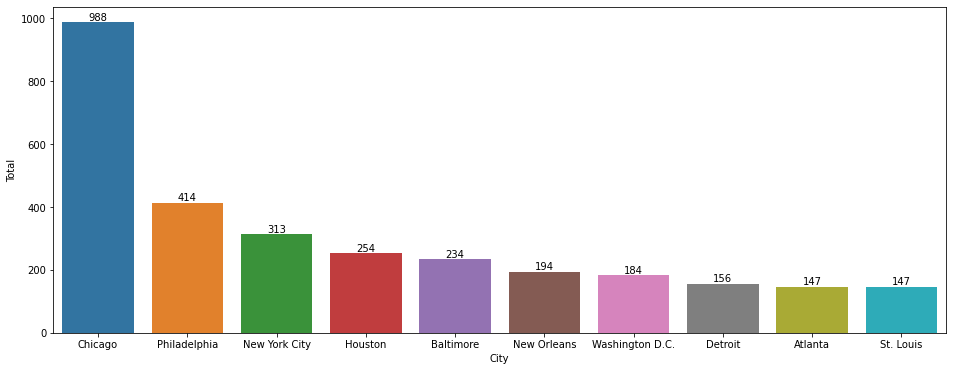

In [17]:
fig = plt.figure(figsize=(16,6))

sns.barplot(x=city_shooting.index, y=city_shooting['Total'], data=city_shooting[0:10])

for i in range(len(city_shooting.index)):
    plt.text(i, city_shooting['Total'][i], str(city_shooting['Total'][i]), ha='center', va='bottom')

plt.show()

## Calculate the average number of victims per year

In [18]:
mass_shooting.head()

,Date,City,State,Dead,Injured,Total,Description,Year,Month,Week
0,2022-07-23,Renton,Washington,1,6,7,"Seven people were shot, one fatally, shortly a...",2022,7,Saturday
1,2022-07-23,Chicago,Illinois,0,4,4,A man got out of a black truck and opened fire...,2022,7,Saturday
2,2022-07-22,Maquoketa,Iowa,4,0,4,Iowa State Park shooting: A man shot and kille...,2022,7,Friday
3,2022-07-21,Los Angeles,California,0,4,4,Two men shot four people standing outside a CV...,2022,7,Thursday
4,2022-07-19,Lincoln,Nebraska,0,4,4,"Four people, including a teenager, were shot i...",2022,7,Tuesday


In [19]:
victims_year = mass_shooting.groupby(['Year']).agg({'Total': 'mean'})
victims_year

,Total
Year,
2018,5.195652
2019,5.165158
2020,4.983766
2021,5.091954
2022,5.223301


### Graph

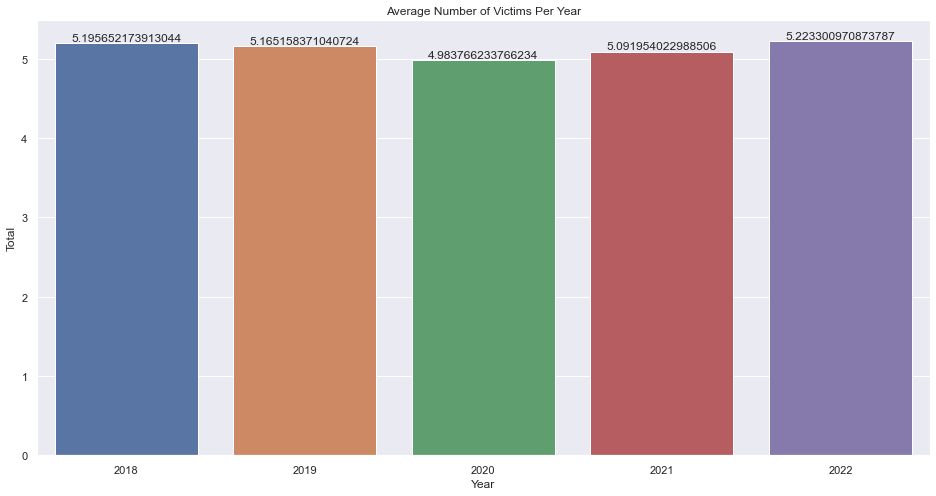

In [20]:
sns.set()
fig = plt.figure(figsize=(16,8))

sns.barplot(x=victims_year.index, y=victims_year['Total'], data=victims_year)

for i in range(len(victims_year.index)):
    plt.text(i, victims_year['Total'].iloc[i], str(victims_year['Total'].iloc[i]), ha='center', va='bottom')

plt.title('Average Number of Victims Per Year')


plt.show()

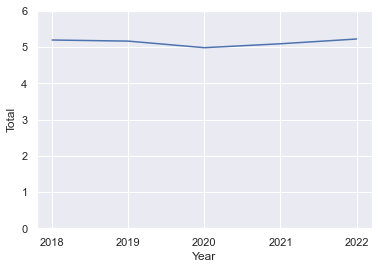

In [21]:
sns.lineplot(x=victims_year.index, y=victims_year['Total'], data=victims_year)
plt.xticks(victims_year.index)
plt.ylim(0, 6)

plt.show()

In [25]:
list_year = victims_year.index.tolist()

In [26]:
list_victims = victims_year['Total'].tolist()

In [27]:
list_year

[2018, 2019, 2020, 2021, 2022]

In [28]:
list_victims

[5.195652173913044,
 5.165158371040724,
 4.983766233766234,
 5.091954022988506,
 5.223300970873787]

In [29]:
xs = np.array(list_year, dtype=np.float64)
ys = np.array(list_victims, dtype=np.float64)

In [30]:
from matplotlib import style

In [32]:
from statistics import mean

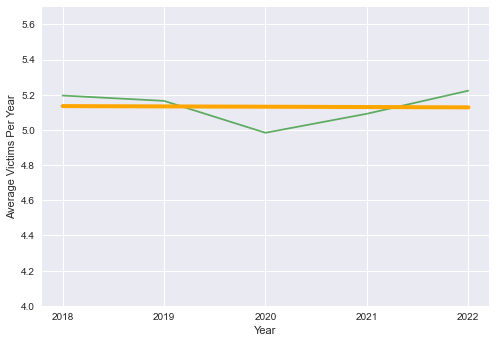

In [43]:
style.use('seaborn')

def best_fit_line(xs, ys):
    slope = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    y_intercept = mean(ys) - slope * mean(xs)
    return slope, y_intercept


slope, y_intercept = best_fit_line(xs, ys)

regression_line = [(slope * x) + y_intercept for x in xs]

plt.plot(xs, ys, label='Data Points', alpha=0.6, color='green')
plt.plot(xs, regression_line, label='Best Fit Line', color='orange', linewidth=4)
plt.xticks(xs)
plt.xlabel('Year')
plt.ylabel('Average Victims Per Year')
plt.ylim(4, 5.7)

plt.show()

In [44]:
mass_shooting.to_csv('mass_shooting_history.csv', index=False)